# Data Mining Project
### By:  Group 3: Elio Aybar, Cristal Garcia, Sunny Li, Matt Norgren

### Data Cleaning

In [74]:
#Packages to import
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000)

from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,VotingClassifier,BaggingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
#from hypopt import GridSearch
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,Perceptron,SGDRegressor
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [48]:
### IMPORT SET

#Change working directory to match where the large files are stored
# it is not best practice to centrally store files this large - although
# git LFS should be explored

### CWD -  MAN
%cd "C:\Users\MAN\OneDrive - The University of Chicago\2020_Autumn\Data Mining Platforms [MSCA 31008]\Group_Project\"
## CWD - Cristal
#%cd "C:\Users\cgarc\OneDrive - The University of Chicago\GitHub\US_HousingData-\docs"
#cd
## CWD - Elio 
#%cd "C:\Users\Tipo\Desktop\GitHub\Project"
## CWD - Sunny
#%cd "/Users/sunny/Data mining/final project"


C:\Users\MAN\OneDrive - The University of Chicago\2020_Autumn\Data Mining Platforms [MSCA 31008]\Group_Project


In [81]:
### Establish Pandas Data Frames / Import

### Zillow Set- Zip 
zip_df = pd.read_csv('Zip_time_series.csv', index_col = 'Date')  ### Issues with NaN on import

## Public School Ratings 
PS_df = pd.read_csv('Public_Schools.csv')

## Starbucks Upto 2017 for 70 Countries
SBUX_df = pd.read_csv('directory.csv')

## Food Desert 
foodlookup_df = pd.read_csv('food_access_variable_lookup.csv')
food_df = pd.read_csv('food_access_research_atlas.csv') 

## Hospital Quality Care 
hospital_df = pd.read_csv('Hospital General Information.csv', encoding="ISO-8859-1")

## Target Up to 2017 for US 
TGT_df = pd.read_csv('target.csv', encoding="ISO-8859-1")

### Individual Set Cleaning (Preparing for Combination

In [16]:
################################
## Food Desert -- Cleaning CG  #
################################
food_df.shape

(72864, 147)

In [17]:
#Columns to drop
food_df.drop(['GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_Vehicle',  'LATractsVehicle_20', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf', 'laasianhalfshare'], axis = 1, inplace = True)
food_df.drop(['lanhopihalf', 'lanhopihalfshare', 'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf', 'lasnaphalfshare', 'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1', 'laseniors1share', 'lawhite1', 'lawhite1share', 'lablack1', 'lablack1share', 'laasian1', 'laasian1share', 'lanhopi1', 'lanhopi1share', 'laaian1', 'laaian1share', 'laomultir1', 'laomultir1share', 'lahisp1', 'lahisp1share', 'lahunv1', 'lahunv1share'], axis = 1, inplace = True)
food_df.drop(['lasnap1', 'lasnap1share', 'lapop10', 'lapop10share', 'lalowi10', 'lalowi10share', 'lakids10', 'lakids10share', 'laseniors10', 'laseniors10share', 'lawhite10', 'lawhite10share', 'lablack10', 'lablack10share', 'laasian10', 'laasian10share', 'lanhopi10', 'lanhopi10share', 'laaian10', 'laaian10share', 'laomultir10', 'laomultir10share', 'lahisp10', 'lahisp10share', 'lahunv10', 'lahunv10share', 'lasnap10', 'lasnap10share', 'lapop20', 'lapop20share', 'lalowi20', 'lalowi20share', 'lakids20', 'lakids20share', 'laseniors20', 'laseniors20share'], axis = 1, inplace = True)
food_df.drop(['lawhite20', 'lawhite20share', 'lablack20', 'lablack20share', 'laasian20', 'laasian20share', 'lanhopi20', 'lanhopi20share', 'laaian20', 'laaian20share', 'laomultir20', 'laomultir20share', 'lahisp20', 'lahisp20share', 'lahunv20', 'lahunv20share'], axis = 1, inplace = True)
food_df.drop(['LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'HUNVFlag', 'lasnap20', 'lasnap20share', 'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'], axis = 1, inplace = True)
food_df.drop(['LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20'], axis = 1, inplace = True)

In [18]:
#Drop Duplication rows
food_df.drop_duplicates(inplace= True)

In [19]:
#There are rows in the data with censustract numbers that no longer apply and the respective row has zero values. Zipcodes 
#couldn't be identified and were replaced with NA's. Drop these respective rows with NA's in zipcode because those aren't 
#functional censustract numbers and the rows also have 0's for more than 70% of columns
food_df = food_df[food_df['Zipcode'].notna()]

KeyError: 'Zipcode'

In [9]:
food_df.shape

(72864, 10)

In [10]:
#Check missing values
food_df.apply(lambda x: sum(x.isnull()))

CensusTract           0
State                 0
County                0
Urban                 0
POP2010               0
OHU2010               0
LowIncomeTracts       0
PovertyRate           0
MedianFamilyIncome    0
LA1and10              0
dtype: int64

In [11]:
#Check unique values
food_df.apply(lambda x: len(x.unique()))

CensusTract           72864
State                    51
County                 1837
Urban                     2
POP2010                9123
OHU2010                4100
LowIncomeTracts           2
PovertyRate             829
MedianFamilyIncome    38925
LA1and10                  2
dtype: int64

In [12]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72864 entries, 0 to 72863
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CensusTract         72864 non-null  int64  
 1   State               72864 non-null  object 
 2   County              72864 non-null  object 
 3   Urban               72864 non-null  int64  
 4   POP2010             72864 non-null  int64  
 5   OHU2010             72864 non-null  int64  
 6   LowIncomeTracts     72864 non-null  int64  
 7   PovertyRate         72864 non-null  float64
 8   MedianFamilyIncome  72864 non-null  int64  
 9   LA1and10            72864 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ MB


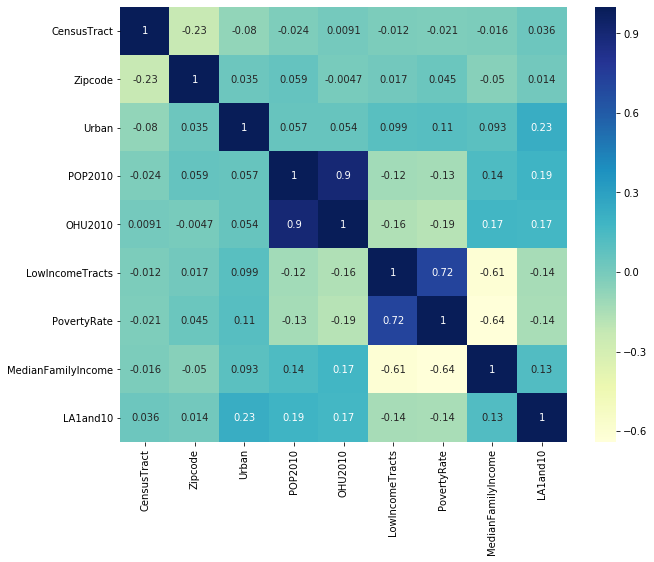

In [12]:
import seaborn as sns
#Visually represent collinearity
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(food_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [13]:
food_df.shape

(72864, 10)

In [14]:
#Groupby Zipcode and find the average of features
food_df = food_df.groupby('Zipcode', as_index=False)['Urban', 'POP2010', 'OHU2010', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'LA1and10'].mean()

KeyError: 'Zipcode'

In [15]:
food_df.apply(lambda x: len(x.unique()))

Zipcode               17496
Urban                   100
POP2010               12712
OHU2010                9746
LowIncomeTracts         156
PovertyRate            6513
MedianFamilyIncome    16252
LA1and10                124
dtype: int64

In [16]:
food_df.head()

,Zipcode,Urban,POP2010,OHU2010,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10
0,1001.0,1.000000,5039.600000,2098.000000,0.200000,9.640000,73672.800000,1.000000
1,1002.0,0.777778,4861.333333,1298.666667,0.666667,24.377778,76141.333333,0.666667
2,1005.0,0.000000,5398.000000,2025.000000,0.000000,4.200000,80846.000000,0.000000
3,1007.0,0.000000,7324.500000,2797.500000,0.000000,7.500000,93071.000000,0.000000
4,1008.0,0.000000,7234.000000,2826.000000,0.000000,5.600000,79719.000000,1.000000


In [17]:
food_df.shape

(17496, 8)

In [21]:
####################################################################
## Public School Ratings (2014-2015 School years) -- Cleaning CG  ##
####################################################################

PS_df.shape

(102370, 33)

In [22]:
#Change 'LEVEL_' to change to integer (1: elementary, 2: middle school, 3: high school, 4:PK-13, N=0: Not specified)
PS_df['LEVEL_'] = PS_df['LEVEL_'].apply({'N':0, '1':1, '2':2, '3':3, '4':4 }.get)

In [23]:
#Drop ZIP4 because 43% of data missing and already have other location indicators; don't need Telephone, website, source, 
#'VAL_METHOD', 'NAICS_CODE'; 'NAICS_DESC' is generalized description of 'LEVEL'; SHELTER_ID doesn't have 76% of data available 

PS_df.drop(['X', 'Y', 'OBJECTID', 'NCESID', 'ZIP4', 'TELEPHONE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'VAL_METHOD', 'VAL_DATE',  'WEBSITE', 'ST_GRADE', 'END_GRADE', 'DISTRICTID',  'SHELTER_ID'], axis = 1, inplace = True)

#Drop Puerto Rico location
PS_df = PS_df[PS_df.COUNTRY != 'PRI']

#Drop Country column since all inland
PS_df.drop(['COUNTRY'], axis = 1, inplace = True)

#Convert SOURCEDATE to actual datatime type
PS_df['SOURCEDATE'] = pd.to_datetime(PS_df['SOURCEDATE'])

In [24]:
#Drop Duplication rows
PS_df.drop_duplicates(inplace= True)

In [25]:
#Drop schools with 0 and negative enrolment
PS_df = PS_df[PS_df.ENROLLMENT > 0]

In [26]:
#Drop schools with 0 and negative count of teachers
PS_df = PS_df[PS_df.FT_TEACHER > 0]

In [27]:
#Create Student: Teacher ratio based on enrollment and Teacher count. 30:1 is the ideal ratio 
PS_df['Class_Teacher_RATIO'] = PS_df['ENROLLMENT'] / PS_df['FT_TEACHER']

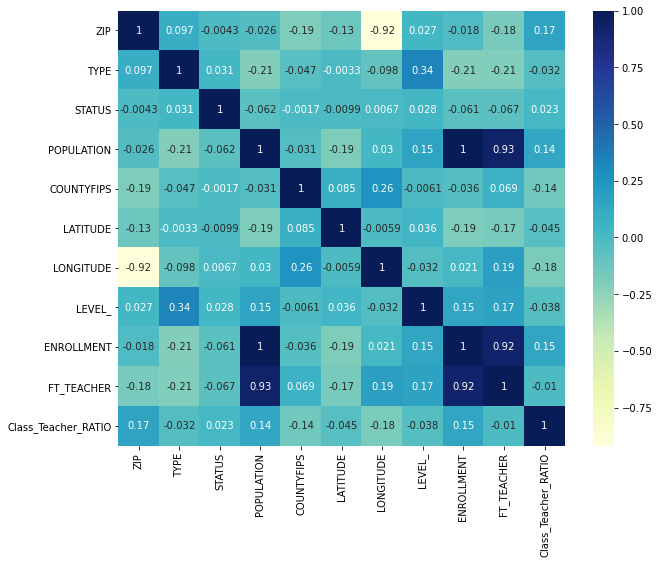

In [28]:
import seaborn as sns
#Visually represent collinearity
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(PS_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [29]:
#Drop Population, Enrollment, and FT_Teacher columns since they have collinearity and enrollment and FT_teacher included in 
#Class_Teacher_RATIO
PS_df.drop(['POPULATION', 'ENROLLMENT', 'FT_TEACHER'], axis = 1, inplace = True)

In [27]:
PS_df.head()

,NAME,ADDRESS,CITY,STATE,ZIP,TYPE,STATUS,COUNTY,COUNTYFIPS,LATITUDE,LONGITUDE,SOURCEDATE,LEVEL_,Class_Teacher_RATIO
0,SAMSULA ACADEMY,248 N SAMSULA DR,NEW SMYRNA,FL,32168,1,1,VOLUSIA,12127,29.022271,-81.050895,2014-02-04 00:00:00+00:00,1,17.076923
1,CAROLINE DORMON JUNIOR HIGH SCHOOL,8906 HWY 165 SOUTH,WOODWORTH,LA,71485,1,1,RAPIDES,22079,31.180659,-92.507288,2015-05-08 00:00:00+00:00,1,14.857143
2,HARRIET BEECHER STOWE ELEMENTARY,44 MCKEEN STREET,BRUNSWICK,ME,4011,1,1,CUMBERLAND,23005,43.908147,-69.971880,2014-02-04 00:00:00+00:00,1,14.211538
3,LEAKE CENTRAL ELEMENTARY SCHOOL,603 HWY. 16 WEST,CARTHAGE,MS,39051,1,1,LEAKE,28079,32.728496,-89.542799,2009-10-13 00:00:00+00:00,1,18.396825
4,KEARNEY ELEM.,902 S JEFFERSON,KEARNEY,MO,64060,1,1,CLAY,29047,39.364359,-94.361775,2009-10-13 00:00:00+00:00,1,12.454545


In [30]:
PS_df.shape

(85938, 14)

In [31]:
#Groupby Zipcode and find avg of features per zipcode
PS_df = PS_df.groupby('ZIP', as_index=False)['TYPE', 'STATUS', 'LEVEL_', 'Class_Teacher_RATIO'].mean()

In [30]:
PS_df.apply(lambda x: len(x.unique()))

ZIP                    20732
TYPE                     176
STATUS                    67
LEVEL_                   243
Class_Teacher_RATIO    17328
dtype: int64

In [31]:
PS_df.shape

(20732, 5)

In [32]:
PS_df.head()

,ZIP,TYPE,STATUS,LEVEL_,Class_Teacher_RATIO
0,1001,1.0,1.0,1.50,15.247192
1,1002,1.0,1.0,1.50,10.940945
2,1005,1.0,1.0,2.25,13.025238
3,1007,1.0,1.0,1.80,13.791365
4,1010,1.0,1.0,1.00,10.777778


In [33]:
##########################
## Target -- Cleaning EA #
##########################
TGT_df.shape

(1829, 47)

In [34]:
TGT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 47 columns):
X.locale                               1829 non-null object
Address.AddressLine1                   1829 non-null object
Address.AddressLine2                   58 non-null object
Address.City                           1829 non-null object
Address.CountryName                    1829 non-null object
Address.County                         1828 non-null object
Address.FormattedAddress               1829 non-null object
Address.IntersectionDescription        1828 non-null object
Address.Latitude                       1829 non-null float64
Address.Longitude                      1829 non-null float64
Address.PostalCode                     1829 non-null object
Address.Subdivision                    1829 non-null object
AlternateIdentifier.ID                 1829 non-null object
ID                                     1829 non-null int64
IsDaylightSavingsTimeRecognized        1829 non-null b

In [35]:
#Select desired variables
TGT_df = TGT_df[['Address.FormattedAddress','Address.AddressLine1','Address.City','Address.CountryName','Address.Latitude','Address.Longitude','Address.County','Address.PostalCode','Address.Subdivision']]

In [36]:
#Analize variable information
TGT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 9 columns):
Address.FormattedAddress    1829 non-null object
Address.AddressLine1        1829 non-null object
Address.City                1829 non-null object
Address.CountryName         1829 non-null object
Address.Latitude            1829 non-null float64
Address.Longitude           1829 non-null float64
Address.County              1828 non-null object
Address.PostalCode          1829 non-null object
Address.Subdivision         1829 non-null object
dtypes: float64(2), object(7)
memory usage: 128.7+ KB


In [37]:
# Count the number of nan values in each column
print(TGT_df.isnull().sum())

Address.FormattedAddress    0
Address.AddressLine1        0
Address.City                0
Address.CountryName         0
Address.Latitude            0
Address.Longitude           0
Address.County              1
Address.PostalCode          0
Address.Subdivision         0
dtype: int64


In [38]:
#Change variable names
TGT_df = TGT_df.rename(columns={"Address.FormattedAddress": "FormattedAddress", 
                   "Address.AddressLine1": "AddressLine1",
                   "Address.City": "City",
                   "Address.CountryName": "CountryName",
                   "Address.Latitude": "Latitude",
                   "Address.Longitude": "Longitude",
                   "Address.County": "County",
                   "Address.PostalCode": "PostalCode",
                   "Address.Subdivision": "Subdivision",
                  })

In [39]:
#Drop missing values in column County variable
TGT_df = TGT_df[TGT_df.County.notnull()]

In [40]:
TGT_df.head()

,FormattedAddress,AddressLine1,City,CountryName,Latitude,Longitude,County,PostalCode,Subdivision
0,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",400 Oxford Exchange Blvd,Oxford,United States,33.608825,-85.783182,Calhoun,36203-3459,AL
1,"2640 Enterprise Dr, Opelika, AL 36801-1511",2640 Enterprise Dr,Opelika,United States,32.618108,-85.410636,Lee,36801-1511,AL
2,"1129 S Park St, Carrollton, GA 30117-4429",1129 S Park St,Carrollton,United States,33.558920,-85.076473,Carroll,30117-4429,GA
3,"555 Bullsboro Dr, Newnan, GA 30265-1045",555 Bullsboro Dr,Newnan,United States,33.392907,-84.758875,Coweta,30265-1045,GA
4,"1591 Bradley Park Dr, Columbus, GA 31904-3071",1591 Bradley Park Dr,Columbus,United States,32.534649,-84.971073,Muscogee,31904-3071,GA


In [41]:
# Count the number of nan values in each column
print(TGT_df.isnull().sum())

FormattedAddress    0
AddressLine1        0
City                0
CountryName         0
Latitude            0
Longitude           0
County              0
PostalCode          0
Subdivision         0
dtype: int64


In [42]:
TGT_df.head()

,FormattedAddress,AddressLine1,City,CountryName,Latitude,Longitude,County,PostalCode,Subdivision
0,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",400 Oxford Exchange Blvd,Oxford,United States,33.608825,-85.783182,Calhoun,36203-3459,AL
1,"2640 Enterprise Dr, Opelika, AL 36801-1511",2640 Enterprise Dr,Opelika,United States,32.618108,-85.410636,Lee,36801-1511,AL
2,"1129 S Park St, Carrollton, GA 30117-4429",1129 S Park St,Carrollton,United States,33.558920,-85.076473,Carroll,30117-4429,GA
3,"555 Bullsboro Dr, Newnan, GA 30265-1045",555 Bullsboro Dr,Newnan,United States,33.392907,-84.758875,Coweta,30265-1045,GA
4,"1591 Bradley Park Dr, Columbus, GA 31904-3071",1591 Bradley Park Dr,Columbus,United States,32.534649,-84.971073,Muscogee,31904-3071,GA


In [43]:
#Add column that identifies Target at specified address (will groupby zipcode and count the number of targets by zipcode)
TGT_df['Target_count'] = 1
TGT_df = TGT_df.groupby('PostalCode', as_index=False)['Target_count'].count()

In [44]:
#Pull shortened zipcode for Target data
TGT_df['PostalCode'] = [x[:5] for x in TGT_df['PostalCode']]

In [45]:
#Convert values to integers
TGT_df['PostalCode'] = TGT_df.PostalCode.astype(int)

In [46]:
TGT_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 0 to 1827
Data columns (total 2 columns):
PostalCode      1828 non-null int32
Target_count    1828 non-null int64
dtypes: int32(1), int64(1)
memory usage: 35.7 KB


In [47]:
TGT_df.shape

(1828, 2)

In [48]:
#############################
## Starbucks -- Cleaning EA #
#############################
SBUX_df.shape

(25600, 13)

In [49]:
SBUX_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
Brand             25600 non-null object
Store Number      25600 non-null object
Store Name        25600 non-null object
Ownership Type    25600 non-null object
Street Address    25598 non-null object
City              25585 non-null object
State/Province    25600 non-null object
Country           25600 non-null object
Postcode          24078 non-null object
Phone Number      18739 non-null object
Timezone          25600 non-null object
Longitude         25599 non-null float64
Latitude          25599 non-null float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [50]:
A_1 = SBUX_df['Brand']
print(A_1.groupby(A_1).count())

Brand
Coffee House Holdings        1
Evolution Fresh              2
Starbucks                25249
Teavana                    348
Name: Brand, dtype: int64


In [51]:
A_2 = SBUX_df['Country']
print(A_2.groupby(A_2).count())

Country
AD        1
AE      144
AR      108
AT       18
AU       22
      ...  
TT        3
TW      394
US    13608
VN       25
ZA        3
Name: Country, Length: 73, dtype: int64


In [52]:
SBUX_df = SBUX_df[SBUX_df["Brand"] == 'Starbucks']

In [53]:
SBUX_df = SBUX_df[SBUX_df["Country"] == 'US']

In [54]:
#Select desired variables
SBUX_df = SBUX_df[['Brand','Street Address','City','State/Province','Country','Postcode','Longitude','Latitude']]

In [55]:
SBUX_df.head()

,Brand,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude
11964,Starbucks,5600 Debarr Rd Ste 9,Anchorage,AK,US,995042300,-149.78,61.21
11965,Starbucks,1725 Abbott Rd,Anchorage,AK,US,995073444,-149.84,61.14
11966,Starbucks,1501 Huffman Rd,Anchorage,AK,US,995153596,-149.85,61.11
11967,Starbucks,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515,-149.89,61.13
11968,Starbucks,1005 E Dimond Blvd,Anchorage,AK,US,995152050,-149.86,61.14


In [56]:
# Count the number of nan values in each column
print(SBUX_df.isnull().sum())

Brand             0
Street Address    0
City              0
State/Province    0
Country           0
Postcode          1
Longitude         0
Latitude          0
dtype: int64


In [57]:
#Drop missing values in column County variable
SBUX_df = SBUX_df[SBUX_df.Postcode .notnull()]

In [58]:
# Count the number of nan values in each column
print(SBUX_df.isnull().sum())

Brand             0
Street Address    0
City              0
State/Province    0
Country           0
Postcode          0
Longitude         0
Latitude          0
dtype: int64


In [59]:
SBUX_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13310 entries, 11964 to 25571
Data columns (total 8 columns):
Brand             13310 non-null object
Street Address    13310 non-null object
City              13310 non-null object
State/Province    13310 non-null object
Country           13310 non-null object
Postcode          13310 non-null object
Longitude         13310 non-null float64
Latitude          13310 non-null float64
dtypes: float64(2), object(6)
memory usage: 935.9+ KB


In [60]:
#Add column that identifies Starbucks at specified address (will groupby zipcode and count the number of targets by zipcode)
SBUX_df['Starbucks_count'] = 1

In [61]:
SBUX_df.head()

,Brand,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude,Starbucks_count
11964,Starbucks,5600 Debarr Rd Ste 9,Anchorage,AK,US,995042300,-149.78,61.21,1
11965,Starbucks,1725 Abbott Rd,Anchorage,AK,US,995073444,-149.84,61.14,1
11966,Starbucks,1501 Huffman Rd,Anchorage,AK,US,995153596,-149.85,61.11,1
11967,Starbucks,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515,-149.89,61.13,1
11968,Starbucks,1005 E Dimond Blvd,Anchorage,AK,US,995152050,-149.86,61.14,1


In [62]:
SBUX_df.shape

(13310, 9)

In [63]:
SBUX_df.apply(lambda x: len(x.unique()))

Brand                  1
Street Address     13194
City                3171
State/Province        51
Country                1
Postcode           12008
Longitude           3330
Latitude            1967
Starbucks_count        1
dtype: int64

In [64]:
#Pull shortened zipcode for Starbucks data
SBUX_df['Postcode'] = [x[:5] for x in SBUX_df['Postcode']]

In [65]:
SBUX_df = SBUX_df.groupby('Postcode', as_index=False)['Starbucks_count'].count()

In [66]:
#Convert values to integers
SBUX_df['Postcode']= SBUX_df.Postcode.astype(int)

In [67]:
SBUX_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 5982
Data columns (total 2 columns):
Postcode           5983 non-null int32
Starbucks_count    5983 non-null int64
dtypes: int32(1), int64(1)
memory usage: 116.9 KB


In [68]:
SBUX_df.shape

(5983, 2)

In [69]:
SBUX_df.head()

,Postcode,Starbucks_count
0,10001,15
1,10002,1
2,10003,10
3,10004,6
4,10005,6


In [82]:
#######################
## Zip -- Cleaning MN #
#######################
zip_df.shape
#Understand range of outputs
#zip_df.describe()

(4383885, 75)

In [83]:
## Understand the number of nulls
zip_df.isnull().sum()

RegionName                                    0
InventorySeasonallyAdjusted_AllHomes    3332781
InventoryRaw_AllHomes                   3332781
MedianListingPricePerSqft_1Bedroom      4375691
MedianListingPricePerSqft_2Bedroom      4297331
                                         ...   
ZRI_AllHomes                            3046523
ZRI_AllHomesPlusMultifamily             3044532
ZriPerSqft_AllHomes                     3129916
Zri_MultiFamilyResidenceRental          3660343
Zri_SingleFamilyResidenceRental         3049564
Length: 75, dtype: int64

In [84]:
## Establish two new columns in order to test logic of replacement / consolidation
zip_df['NumberOfBedrooms'] = 0
zip_df['DwellingType'] = 0
zip_df['MedianListingPricePerSqft'] = 0
zip_df['MedianListingPrice'] = 0
zip_df['MedianRentalPrice'] = 0
zip_df['MedianRentalPricePerSqft'] = 0
zip_df['MedianListPPS_D'] = 0
zip_df['MedianList_D'] = 0
zip_df['MedianRentalPPS_D'] = 0
zip_df['MedianRental_D'] = 0

In [85]:
## Replace null with 0
zip_df['MedianListingPricePerSqft_1Bedroom'] = zip_df['MedianListingPricePerSqft_1Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_2Bedroom'] = zip_df['MedianListingPricePerSqft_2Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_3Bedroom'] = zip_df['MedianListingPricePerSqft_3Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_4Bedroom'] = zip_df['MedianListingPricePerSqft_4Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_5BedroomOrMore'] = zip_df['MedianListingPricePerSqft_5BedroomOrMore'].fillna(0)
##
zip_df['MedianListingPrice_1Bedroom'] = zip_df['MedianListingPrice_1Bedroom'].fillna(0)
zip_df['MedianListingPrice_2Bedroom'] = zip_df['MedianListingPrice_2Bedroom'].fillna(0)
zip_df['MedianListingPrice_3Bedroom'] = zip_df['MedianListingPrice_3Bedroom'].fillna(0)
zip_df['MedianListingPrice_4Bedroom'] = zip_df['MedianListingPrice_4Bedroom'].fillna(0)
zip_df['MedianListingPrice_5BedroomOrMore'] = zip_df['MedianListingPrice_5BedroomOrMore'].fillna(0)
##
zip_df['MedianRentalPricePerSqft_1Bedroom'] = zip_df['MedianRentalPricePerSqft_1Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_2Bedroom'] = zip_df['MedianRentalPricePerSqft_2Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_3Bedroom'] = zip_df['MedianRentalPricePerSqft_3Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_4Bedroom'] = zip_df['MedianRentalPricePerSqft_4Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_5BedroomOrMore'] = zip_df['MedianRentalPricePerSqft_5BedroomOrMore'].fillna(0)
##
zip_df['MedianRentalPrice_1Bedroom'] = zip_df['MedianRentalPrice_1Bedroom'].fillna(0)
zip_df['MedianRentalPrice_2Bedroom'] = zip_df['MedianRentalPrice_2Bedroom'].fillna(0)
zip_df['MedianRentalPrice_3Bedroom'] = zip_df['MedianRentalPrice_3Bedroom'].fillna(0)
zip_df['MedianRentalPrice_4Bedroom'] = zip_df['MedianRentalPrice_4Bedroom'].fillna(0)
zip_df['MedianRentalPrice_5BedroomOrMore'] = zip_df['MedianRentalPrice_5BedroomOrMore'].fillna(0)
##
zip_df['MedianListingPrice_AllHomes'] = zip_df['MedianListingPrice_AllHomes'].fillna(0)
zip_df['MedianListingPrice_CondoCoop'] = zip_df['MedianListingPrice_CondoCoop'].fillna(0)
zip_df['MedianListingPrice_DuplexTriplex'] = zip_df['MedianListingPrice_DuplexTriplex'].fillna(0)
zip_df['MedianListingPrice_SingleFamilyResidence'] = zip_df['MedianListingPrice_SingleFamilyResidence'].fillna(0)
##
zip_df['MedianListingPrice_AllHomes'] = zip_df['MedianListingPrice_AllHomes'].fillna(0)
zip_df['MedianListingPrice_CondoCoop'] = zip_df['MedianListingPrice_CondoCoop'].fillna(0)
zip_df['MedianListingPrice_DuplexTriplex'] = zip_df['MedianListingPrice_DuplexTriplex'].fillna(0)
zip_df['MedianListingPrice_SingleFamilyResidence'] = zip_df['MedianListingPrice_SingleFamilyResidence'].fillna(0)
##
zip_df['MedianListingPricePerSqft_AllHomes'] = zip_df['MedianListingPricePerSqft_AllHomes'].fillna(0)
zip_df['MedianListingPricePerSqft_CondoCoop'] = zip_df['MedianListingPricePerSqft_CondoCoop'].fillna(0)
zip_df['MedianListingPricePerSqft_DuplexTriplex'] = zip_df['MedianListingPricePerSqft_DuplexTriplex'].fillna(0)
zip_df['MedianListingPricePerSqft_SingleFamilyResidence'] = zip_df['MedianListingPricePerSqft_SingleFamilyResidence'].fillna(0)
##
zip_df['MedianRentalPrice_AllHomes'] = zip_df['MedianRentalPrice_AllHomes'].fillna(0)
zip_df['MedianRentalPrice_CondoCoop'] = zip_df['MedianRentalPrice_CondoCoop'].fillna(0)
zip_df['MedianRentalPrice_DuplexTriplex'] = zip_df['MedianRentalPrice_DuplexTriplex'].fillna(0)
zip_df['MedianRentalPrice_SingleFamilyResidence'] = zip_df['MedianRentalPrice_SingleFamilyResidence'].fillna(0)
##
zip_df['MedianRentalPricePerSqft_AllHomes'] = zip_df['MedianRentalPricePerSqft_AllHomes'].fillna(0)
zip_df['MedianRentalPricePerSqft_CondoCoop'] = zip_df['MedianRentalPricePerSqft_CondoCoop'].fillna(0)
zip_df['MedianRentalPricePerSqft_DuplexTriplex'] = zip_df['MedianRentalPricePerSqft_DuplexTriplex'].fillna(0)
zip_df['MedianRentalPricePerSqft_SingleFamilyResidence'] = zip_df['MedianRentalPricePerSqft_SingleFamilyResidence'].fillna(0)
zip_df['MedianPctOfPriceReduction_AllHomes'] = zip_df['MedianPctOfPriceReduction_AllHomes'].fillna(0)
zip_df['MedianPctOfPriceReduction_CondoCoop'] = zip_df['MedianPctOfPriceReduction_CondoCoop'].fillna(0)
zip_df['MedianPctOfPriceReduction_SingleFamilyResidence'] = zip_df['MedianPctOfPriceReduction_SingleFamilyResidence'].fillna(0)
zip_df['MedianPriceCutDollar_AllHomes'] = zip_df['MedianPriceCutDollar_AllHomes'].fillna(0)
zip_df['MedianPriceCutDollar_CondoCoop'] = zip_df['MedianPriceCutDollar_CondoCoop'].fillna(0)
zip_df['MedianPriceCutDollar_SingleFamilyResidence'] = zip_df['MedianPriceCutDollar_SingleFamilyResidence'].fillna(0)

In [86]:
## Optimized set in order to iterate through and assign a value to the new column created
## Many prior attempts utilized a more if then style structure but inevitably took a considerably long time
## and replaced when the value was 0  thus overwriting the prior data at every run
##WC: https://guillim.github.io/pandas/2018/10/22/Pandas-if-else-on-columns.html 

condlist = [
    (zip_df['MedianListingPricePerSqft_1Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_2Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_3Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_4Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_5BedroomOrMore'] != 0)
]

condlist2 = [(zip_df['MedianRentalPricePerSqft_AllHomes'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_CondoCoop'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_DuplexTriplex'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_SingleFamilyResidence'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_Studio'] != 0)
]
      
#Establish if the criteria is met - what is the result
choicelist = [1,2,3,4,5]
choicelist2 = ['All','Condo','Duplex+','Single','Multi5+','Studio']
#Overwrite the number of bedroom columns with the given logic output 
zip_df['NumberOfBedrooms'] = np.select(condlist,choicelist)
zip_df['DwellingType'] = np.select(condlist2,choicelist2)

In [55]:
## Count per of decided bedrooms
zip_df['NumberOfBedrooms'].groupby(zip_df['NumberOfBedrooms']).count()

NumberOfBedrooms
0    3951999
1       8194
2      80569
3     310476
4      30627
5       2020
Name: NumberOfBedrooms, dtype: int64

In [87]:
## Count per of decided dwelling types
zip_df['DwellingType'].groupby(zip_df['DwellingType']).count()

DwellingType
All         120843
Condo          677
Duplex+       1231
Multi5+    4260210
Single         924
Name: DwellingType, dtype: int64

In [77]:
##Further Cleanup of like variables

## Optimized set in order to iterate through and assign a value to the new column created
## Many prior attempts utilized a more if then style structure but inevitably took a considerably long time
## and replaced when the value was 0  thus overwriting the prior data at every run
##WC: https://guillim.github.io/pandas/2018/10/22/Pandas-if-else-on-columns.html 

#condlist2 = [
#    (zip_df['MedianListingPrice_1Bedroom'] != 0)
#    ,(zip_df['MedianRentalPrice_1Bedroom'] != 0)
#    ,(zip_df['MedianRentalPricePerSqft_1Bedroom'] != 0)
#    ,(zip_df['MedianListingPrice_2Bedroom'] != 0)
#    ,(zip_df['MedianRentalPrice_2Bedroom'] != 0)
#    ,(zip_df['MedianRentalPricePerSqft_2Bedroom'] != 0)
#    ,(zip_df['MedianListingPrice_3Bedroom'] != 0)
#    ,(zip_df['MedianRentalPrice_3Bedroom'] != 0)
#    ,(zip_df['MedianRentalPricePerSqft_3Bedroom'] != 0)
#    ,(zip_df['MedianListingPrice_4Bedroom'] != 0)
#    ,(zip_df['MedianRentalPrice_4Bedroom'] != 0)
#    ,(zip_df['MedianRentalPricePerSqft_4Bedroom'] != 0)
#    ,(zip_df['MedianListingPrice_5BedroomOrMore'] != 0)
#    ,(zip_df['MedianRentalPrice_5BedroomOrMore'] != 0)
#    ,(zip_df['MedianRentalPricePerSqft_5BedroomOrMore'] != 0)
#]
#Establish if the criteria is met - what is the result
#choicelist2 = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]
#Overwrite the number of bedroom columns with the given logic output 
#zip_df['NumberOfBedrooms'] = np.select(condlist2,choicelist2)

In [88]:
##Combine the bedroom columns into the median listing price per sqft column to reduce column space

zip_df['MedianListingPricePerSqft'] = (zip_df['MedianListingPricePerSqft_1Bedroom']
          + zip_df['MedianListingPricePerSqft_2Bedroom']
          + zip_df['MedianListingPricePerSqft_3Bedroom']
          + zip_df['MedianListingPricePerSqft_4Bedroom']
          + zip_df['MedianListingPricePerSqft_5BedroomOrMore'])
zip_df['MedianListingPrice'] = (zip_df['MedianListingPrice_1Bedroom']
          + zip_df['MedianListingPrice_2Bedroom']
          + zip_df['MedianListingPrice_3Bedroom']
          + zip_df['MedianListingPrice_4Bedroom']
          + zip_df['MedianListingPrice_5BedroomOrMore'])
zip_df['MedianRentalPricePerSqft'] = (zip_df['MedianRentalPricePerSqft_1Bedroom']
          + zip_df['MedianRentalPricePerSqft_2Bedroom']
          + zip_df['MedianRentalPricePerSqft_3Bedroom']
          + zip_df['MedianRentalPricePerSqft_4Bedroom']
          + zip_df['MedianRentalPricePerSqft_5BedroomOrMore'])
zip_df['MedianRentalPrice'] = (zip_df['MedianRentalPrice_1Bedroom']
          + zip_df['MedianRentalPrice_2Bedroom']
          + zip_df['MedianRentalPrice_3Bedroom']
          + zip_df['MedianRentalPrice_4Bedroom']
          + zip_df['MedianRentalPrice_5BedroomOrMore'])
zip_df['MedianListPPS_D'] = (zip_df['MedianListingPricePerSqft_AllHomes']
          + zip_df['MedianListingPricePerSqft_CondoCoop']
          + zip_df['MedianListingPricePerSqft_DuplexTriplex']
          + zip_df['MedianListingPricePerSqft_SingleFamilyResidence'])
zip_df['MedianList_D'] = (zip_df['MedianListingPrice_AllHomes']
          + zip_df['MedianListingPrice_CondoCoop']
          + zip_df['MedianListingPrice_DuplexTriplex']
          + zip_df['MedianListingPrice_SingleFamilyResidence'])
zip_df['MedianRentalPPS_D'] = (zip_df['MedianRentalPricePerSqft_AllHomes']
          + zip_df['MedianRentalPricePerSqft_CondoCoop']
          + zip_df['MedianRentalPricePerSqft_DuplexTriplex']
          + zip_df['MedianRentalPricePerSqft_SingleFamilyResidence'])
zip_df['MedianRental_D'] = (zip_df['MedianRentalPrice_AllHomes']
          + zip_df['MedianRentalPrice_CondoCoop']
          + zip_df['MedianRentalPrice_DuplexTriplex']
          + zip_df['MedianRentalPrice_SingleFamilyResidence'])

In [92]:
### Drop unneeded columns
zip_df = zip_df[[
         'RegionName'
        , 'InventorySeasonallyAdjusted_AllHomes'
        , 'InventoryRaw_AllHomes'
        , 'NumberOfBedrooms'
        , 'DwellingType'
        , 'MedianListingPricePerSqft'
        , 'MedianListingPrice'
        , 'MedianRentalPrice'
        , 'MedianRentalPricePerSqft'
        , 'MedianListPPS_D'
        , 'MedianList_D'
        , 'MedianRentalPPS_D'
        , 'MedianRental_D']]

In [94]:
zip_df.head()

,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,NumberOfBedrooms,DwellingType,MedianListingPricePerSqft,MedianListingPrice,MedianRentalPrice,MedianRentalPricePerSqft,MedianListPPS_D,MedianList_D,MedianRentalPPS_D,MedianRental_D
Date,,,,,,,,,,,,,
1996-04-30,1001,NaN,NaN,0,Multi5+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-04-30,1002,NaN,NaN,0,Multi5+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-04-30,1005,NaN,NaN,0,Multi5+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-04-30,1007,NaN,NaN,0,Multi5+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-04-30,1008,NaN,NaN,0,Multi5+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
## Establish date range to 2017 for normalization
zip_df = zip_df.loc['2017-01-01':'2017-12-31']

In [105]:
zip_df.describe()

,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,NumberOfBedrooms,MedianListingPricePerSqft,MedianListingPrice,MedianRentalPrice,MedianRentalPricePerSqft,MedianListPPS_D,MedianList_D,MedianRentalPPS_D,MedianRental_D
count,228564.000000,131388.000000,131388.000000,228564.000000,228564.000000,2.285640e+05,228564.000000,228564.000000,228564.000000,2.285640e+05,228564.000000,228564.000000
mean,47305.654696,89.497861,89.523952,0.854360,101.075899,1.916956e+05,337.387504,0.247006,209.480569,3.640238e+05,0.375723,518.211871
std,28299.732036,88.917686,89.474157,1.322437,275.822084,6.316838e+05,1588.084159,1.069824,327.166931,5.991798e+05,1.355205,1720.316493
min,745.000000,3.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,23310.000000,35.000000,34.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,45769.000000,64.000000,64.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,153.704592,2.180000e+05,0.000000,0.000000
75%,72023.000000,114.000000,114.000000,2.000000,112.601070,1.624000e+05,0.000000,0.000000,295.224121,5.248500e+05,0.000000,0.000000
max,99901.000000,1923.000000,1993.000000,5.000000,8377.764983,2.144250e+07,95000.000000,36.422619,5378.481328,1.311650e+07,45.133745,100000.000000


In [81]:
## Validation check to understand frequency



In [82]:
#########################################
## Hospital Quality Care -- Cleaning SL #
#########################################
hospital_df.shape

(4812, 28)

In [83]:
hospital_df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...


In [84]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
Provider ID                                                      4812 non-null int64
Hospital Name                                                    4812 non-null object
Address                                                          4812 non-null object
City                                                             4812 non-null object
State                                                            4812 non-null object
ZIP Code                                                         4812 non-null int64
County Name                                                      4797 non-null object
Phone Number                                                     4812 non-null int64
Hospital Type                                                    4812 non-null object
Hospital Ownership                                               4812 non-null object
Emergency Services                  

In [85]:
null_df = hospital_df.isnull().sum(axis = 0).sort_values().to_frame('missing_value')
null_df[null_df['missing_value'] > 0].reset_index()

,index,missing_value
0,County Name,15
1,Meets criteria for meaningful use of EHRs,143
2,Safety of care national comparison footnote,2644
3,Efficient use of medical imaging national comp...,2779
4,Hospital overall rating footnote,3414
5,Patient experience national comparison footnote,3443
6,Mortality national comparison footnote,3460
7,Timeliness of care national comparison footnote,3546
8,Effectiveness of care national comparison foot...,3610
9,Readmission national comparison footnote,3795


In [86]:
# drop provider id, hospital name, address, phone number since they are all irrelevant 
# also drop all footnote since they are all incorporate in the other columns.
drop_these = ['Provider ID', 'Hospital Name', 'Phone Number']
drop_these.extend([col for col in hospital_df if 'footnote' in col])
hospital_df = hospital_df.drop(columns = drop_these)

# hospital_df.loc[:,hospital_df.columns.str.endswith('footnote')]

In [87]:
hospital_df.head()

,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the national average,Above the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
1,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average
2,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average,Same as the national average
3,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,Same as the national average,Not Available,Below the national average,Same as the national average,Below the national average,Above the national average,Not Available
4,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,Yes,Y,3,Same as the national average,Not Available,Same as the national average,Not Available,Same as the national average,Above the national average,Not Available


In [88]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 17 columns):
Address                                                 4812 non-null object
City                                                    4812 non-null object
State                                                   4812 non-null object
ZIP Code                                                4812 non-null int64
County Name                                             4797 non-null object
Hospital Type                                           4812 non-null object
Hospital Ownership                                      4812 non-null object
Emergency Services                                      4812 non-null object
Meets criteria for meaningful use of EHRs               4669 non-null object
Hospital overall rating                                 4812 non-null object
Mortality national comparison                           4812 non-null object
Safety of care national comparison             

In [89]:
null_df = hospital_df.isnull().sum(axis = 0).sort_values().to_frame('missing_value')
null_df[null_df['missing_value'] > 0].reset_index()

,index,missing_value
0,County Name,15
1,Meets criteria for meaningful use of EHRs,143


In [90]:
hospital_df['Meets criteria for meaningful use of EHRs'].value_counts()

Y                4668
Not Available       1
Name: Meets criteria for meaningful use of EHRs, dtype: int64

In [91]:
hospital_df['Meets criteria for meaningful use of EHRs'] = hospital_df['Meets criteria for meaningful use of EHRs'].fillna('Not Available')

In [92]:
hospital_df['County Name'].value_counts()

LOS ANGELES    83
COOK           51
JEFFERSON      47
WASHINGTON     44
MONTGOMERY     43
               ..
COOPER          1
MAHASKA         1
WOODS           1
WELD            1
PIPESTONE       1
Name: County Name, Length: 1563, dtype: int64

In [93]:
hospital_df.head()

,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the national average,Above the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
1,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average
2,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average,Same as the national average
3,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,Same as the national average,Not Available,Below the national average,Same as the national average,Below the national average,Above the national average,Not Available
4,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,Yes,Y,3,Same as the national average,Not Available,Same as the national average,Not Available,Same as the national average,Above the national average,Not Available


In [94]:
hospital_df['Hospital Ownership'].value_counts()

Voluntary non-profit - Private                 2052
Proprietary                                     800
Government - Hospital District or Authority     561
Voluntary non-profit - Other                    462
Government - Local                              407
Voluntary non-profit - Church                   343
Physician                                        68
Government - State                               65
Government - Federal                             45
Tribal                                            9
Name: Hospital Ownership, dtype: int64

In [95]:
hospital_df['Hospital Ownership'] = hospital_df['Hospital Ownership'].replace({
                    'Voluntary non-profit - Private': 'non-profit', 
                    'Proprietary':'for-profit', 
                    'Government - Hospital District or Authority': 'government',
                    'Voluntary non-profit - Other':'non-profit',
                    'Government - Local':'government',
                    'Voluntary non-profit - Church':'non-profit',
                    'Physician':'for-profit',
                    'Government - State':'government',
                    'Tribal ':'government',
                    'Government - Federal':'government',
                                  })

In [96]:
hospital_df['Hospital Type'].value_counts()

Acute Care Hospitals         3369
Critical Access Hospitals    1344
Childrens                      99
Name: Hospital Type, dtype: int64

There are four level in the following 7 aspect: 
Mortality national comparison; 
Safety of care national comparison;
Safety of care national comparison;
Readmission national comparison	Patient experience national comparison	Effectiveness of care national comparison	Timeliness of care national comparison	Efficient use of medical imaging national comparison
-1 Below the national average
0Same as the national average                    
1Above the national average       
Not Available   

In [97]:
# there are four level in the following 7 aspect
#Same as the national average    
#Not Available                   
#Above the national average       
#Below the national average
hospital_df['Mortality national comparison'].value_counts()

Same as the national average    2719
Not Available                   1352
Above the national average       400
Below the national average       341
Name: Mortality national comparison, dtype: int64

In [98]:
hospital_df['Safety of care national comparison'].value_counts()

Not Available                   2168
Same as the national average    1194
Above the national average       786
Below the national average       664
Name: Safety of care national comparison, dtype: int64

In [99]:

hospital_df['Readmission national comparison'].value_counts()

Same as the national average    2119
Not Available                   1017
Below the national average       866
Above the national average       810
Name: Readmission national comparison, dtype: int64

In [100]:
hospital_df['Safety of care national comparison'].value_counts()

Not Available                   2168
Same as the national average    1194
Above the national average       786
Below the national average       664
Name: Safety of care national comparison, dtype: int64

### Consolidation
https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

In [102]:
#### Consolidate dataframes for ease of use
#pd.concat()
PS_df.shape

(20732, 5)

In [112]:
food_df.head()

,ZIP,Urban,POP2010,OHU2010,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10
0,1001.0,1.000000,5039.600000,2098.000000,0.200000,9.640000,73672.800000,1.000000
1,1002.0,0.777778,4861.333333,1298.666667,0.666667,24.377778,76141.333333,0.666667
2,1005.0,0.000000,5398.000000,2025.000000,0.000000,4.200000,80846.000000,0.000000
3,1007.0,0.000000,7324.500000,2797.500000,0.000000,7.500000,93071.000000,0.000000
4,1008.0,0.000000,7234.000000,2826.000000,0.000000,5.600000,79719.000000,1.000000


In [111]:
#Rename Column
food_df.rename(columns = {'Zipcode': 'ZIP'}, inplace=True)

In [113]:
#Left Join food to PS data (want to make sure keep as much data as possible)
PS_food_df = PS_df.merge(food_df, on="ZIP", how="left") 
PS_food_df.head()

,ZIP,TYPE,STATUS,LEVEL_,Class_Teacher_RATIO,Urban,POP2010,OHU2010,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10
0,1001,1.0,1.0,1.50,15.247192,1.000000,5039.600000,2098.000000,0.200000,9.640000,73672.800000,1.000000
1,1002,1.0,1.0,1.50,10.940945,0.777778,4861.333333,1298.666667,0.666667,24.377778,76141.333333,0.666667
2,1005,1.0,1.0,2.25,13.025238,0.000000,5398.000000,2025.000000,0.000000,4.200000,80846.000000,0.000000
3,1007,1.0,1.0,1.80,13.791365,0.000000,7324.500000,2797.500000,0.000000,7.500000,93071.000000,0.000000
4,1010,1.0,1.0,1.00,10.777778,0.000000,3609.000000,1429.000000,0.000000,3.000000,115927.000000,0.000000


In [114]:
PS_food_df.shape

(20732, 12)

In [115]:
TGT_df.shape

(1828, 2)

In [116]:
SBUX_df.shape

(5983, 2)

In [119]:
#Rename SBUX and TGT columns
SBUX_df.rename(columns = {'Postcode': 'ZIP'}, inplace=True)
TGT_df.rename(columns = {'PostalCode': 'ZIP'}, inplace=True)

In [120]:
#Left Join TGT to SBUX
SBUX_TGT_df = SBUX_df.merge(TGT_df, on="ZIP", how="left")
SBUX_TGT_df.head()

,ZIP,Starbucks_count,Target_count
0,10001,15,NaN
1,10002,1,NaN
2,10003,10,NaN
3,10004,6,NaN
4,10005,6,NaN


In [121]:
SBUX_TGT_df.shape

(6035, 3)

In [122]:
features_df = PS_food_df.merge(SBUX_TGT_df, on="ZIP", how="left")
features_df.head()

,ZIP,TYPE,STATUS,LEVEL_,Class_Teacher_RATIO,Urban,POP2010,OHU2010,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,Starbucks_count,Target_count
0,1001,1.0,1.0,1.50,15.247192,1.000000,5039.600000,2098.000000,0.200000,9.640000,73672.800000,1.000000,NaN,NaN
1,1002,1.0,1.0,1.50,10.940945,0.777778,4861.333333,1298.666667,0.666667,24.377778,76141.333333,0.666667,NaN,NaN
2,1005,1.0,1.0,2.25,13.025238,0.000000,5398.000000,2025.000000,0.000000,4.200000,80846.000000,0.000000,NaN,NaN
3,1007,1.0,1.0,1.80,13.791365,0.000000,7324.500000,2797.500000,0.000000,7.500000,93071.000000,0.000000,NaN,NaN
4,1010,1.0,1.0,1.00,10.777778,0.000000,3609.000000,1429.000000,0.000000,3.000000,115927.000000,0.000000,NaN,NaN


In [123]:
features_df.shape

(20781, 14)

### Dimensional Reduction & Quick Analysis

### Feature Engineering
https://pypi.org/project/autoimpute/

### Model Training

In [ ]:
#(test as much algorithm as possible, possible models include Random Forest, Gradient Boosting, Ada-Boosting, Voting Classifier...)

### Hyperparameter Tuning

Use Randome search training for parameters found in following article: 
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#### Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

#### Minimum number of samples required at each leaf node
min_samples_leaf = [0.05, 0.10, 0.13, 0.15, 0.20, 0.26, 0.5]

#### Create the random grid
random_grid = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

#### Use the random grid to search for best hyperparameters
#### First create the base model to tune
dt = DecisionTreeRegressor()

#### Random search of parameters, using 10 fold cross validation, 
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, cv = 10, random_state=3, n_jobs = -1)
#dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=3, n_jobs = -1)

#### Fit the random search model
dt_random.fit(X_train, y_train)

#### See what best parameters from fitting the random search: 
dt_random.best_params_

### Model Accuracy Testing